### 토픽 모델링
- 문서 집합의 추상적인 "주제"를 발견하기 위한 통계적 모델 중 하나
- 텍스트 본문의 숨겨진 의미 구조를 발견하기 위해 사용되는 텍스트 마이닝 기법 중 하나
- 수없이 쏟아지는 비정형 텍스트의 집합을 이해하기 쉽도록 조직하고 정리할 수 있음
- 텍스트 마이닝, 유전자 정보, 이미지, 네트워크와 같은 자료에서 유의미한 구조를 발견하는데 사용됨

In [ ]:
# !pip install jinja2

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [3]:
# read_json 으로 url 불러오기
# 연합뉴스 기사

url = "https://raw.githubusercontent.com/KLUE-benchmark/KLUE/main/klue_benchmark/ynat-v1.1/ynat-v1.1_train.json"

df = pd.read_json(url)[['title', 'label']]
df.shape

(45678, 2)

In [4]:
df.head(3)

,title,label
0,유튜브 내달 2일까지 크리에이터 지원 공간 운영,생활문화
1,어버이날 맑다가 흐려져…남부지방 옅은 황사,생활문화
2,내년부터 국가RD 평가 때 논문건수는 반영 않는다,사회


In [6]:
df['label'].value_counts()

label
세계      8320
스포츠     7742
정치      7379
경제      6118
생활문화    5751
IT과학    5235
사회      5133
Name: count, dtype: int64

In [ ]:
# normalize=True : 비율 계산
df['label'].value_counts(normalize=True)

label
세계      0.182145
스포츠     0.169491
정치      0.161544
경제      0.133938
생활문화    0.125903
IT과학    0.114607
사회      0.112374
Name: proportion, dtype: float64

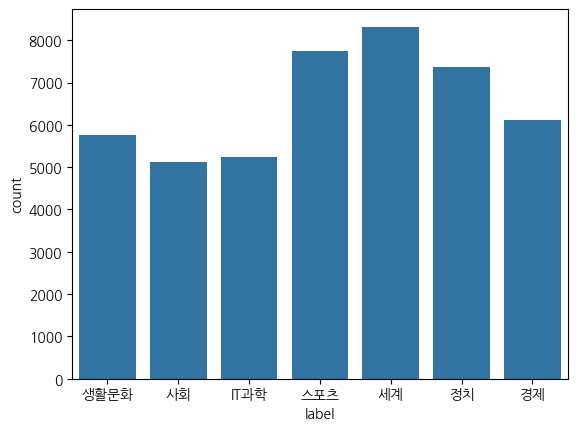

In [9]:
sns.countplot(data=df, x='label');

### TF-IDF

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)
tfidf

,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None
,analyzer,'word'
,stop_words,None
,token_pattern,'(?u)\\b\\w\\w+\\b'
,ngram_range,"(1, ...)"


In [11]:
dtm = tfidf.fit_transform(df['title'])
dtm

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 174269 stored elements and shape (45678, 5000)>

In [15]:
df['label'].unique().tolist()

['생활문화', '사회', 'IT과학', '스포츠', '세계', '정치', '경제']

In [16]:
# 데이터 프레임 형태로 생성

df_dtm = pd.DataFrame(dtm.toarray(), columns=tfidf.get_feature_names_out())
df_dtm.head(2)

,00,01,02,03,10,100,100년,100만,100만명,100만원,...,흥행,희망,희비,희생자,히어로즈,힐러리,힐러리트럼프,힐만,힘으로,女배구
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<Axes: title={'center': 'TF-IDF 가중치 합'}>

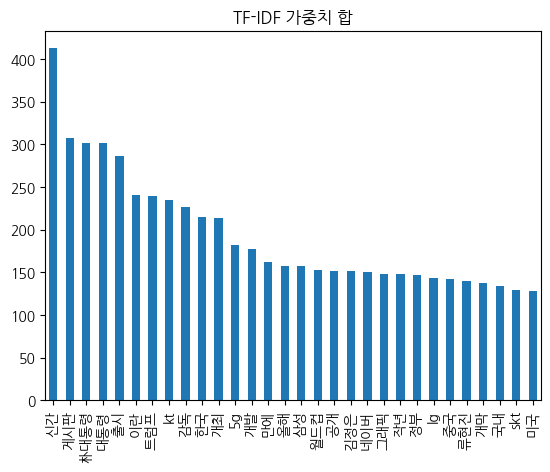

In [17]:
# 컬럼이 많으니까 가중치 합을 내서 상위 30위권까지 보기

df_dtm.sum().nlargest(30).plot(kind='bar', title="TF-IDF 가중치 합")

## LDA 토픽모델링

In [18]:
from sklearn.decomposition import LatentDirichletAllocation

LDA_MODEL = LatentDirichletAllocation(n_components=7, random_state=42)
W = LDA_MODEL.fit_transform(df_dtm)
W

array([[0.04449451, 0.0444551 , 0.04524475, ..., 0.04469549, 0.3782492 ,
        0.04465136],
       [0.0524628 , 0.05229602, 0.05229605, ..., 0.25794639, 0.05229604,
        0.05229601],
       [0.22888953, 0.04768092, 0.53269479, ..., 0.04768092, 0.04769199,
        0.04768092],
       ...,
       [0.0445737 , 0.19359759, 0.04455075, ..., 0.04455952, 0.04482674,
        0.58313365],
       [0.04462784, 0.34011127, 0.04445698, ..., 0.0445188 , 0.43736398,
        0.04446413],
       [0.03762357, 0.03764996, 0.03762073, ..., 0.03762725, 0.03761653,
        0.44410891]], shape=(45678, 7))

- W : 원본 데이터 X의 각 행이 어떻게 H의 각 행(또는 특성)의 조합으로 표현될 수 있는지를 나타냄
  - Weight matrix 또는 Basis matrix 라고 불리는 행렬을 의미
- H
  - n_components 에 지정된 수의 행을 가지며, 원본 데이터 X의 열과 동일한 수의 열을 가짐
  - 원본 데이터 X의 열(특성)을 새로운 축소된 차원의 특성으로 표현
  - Coefficient matrix 또는 Encoding matrix 라고 불리는 행렬 의미(잠재적 특성들이 원본 데이터를 어떻게 재구성하는가?)


In [19]:
# H 값 구하기

H = LDA_MODEL.components_
H

array([[ 8.29404381,  0.14285811,  0.14295877, ...,  0.14286671,
         0.14317187,  0.14286659],
       [ 0.14305165,  0.14285794,  0.14301416, ...,  0.14288728,
         0.14296383,  0.14287059],
       [ 0.14288713,  0.14329873,  0.14285841, ...,  0.1429588 ,
         0.14304   ,  0.14301055],
       ...,
       [ 0.14292918,  0.14288538,  0.14285816, ...,  0.1428787 ,
         6.46711218,  0.14286271],
       [ 0.14285782,  0.14288626,  1.31770666, ...,  0.64494793,
         0.14314918, 13.15958569],
       [ 0.143187  ,  6.18827967,  3.15489323, ...,  1.62037752,
         0.14291194,  0.14295062]], shape=(7, 5000))

In [20]:
W.shape, H.shape

((45678, 7), (7, 5000))

In [21]:
df_lda_W = pd.DataFrame(W)
df_lda_W.head()

,0,1,2,3,4,5,6
0,0.044495,0.044455,0.045245,0.398210,0.044695,0.378249,0.044651
1,0.052463,0.052296,0.052296,0.480407,0.257946,0.052296,0.052296
2,0.228890,0.047681,0.532695,0.047681,0.047681,0.047692,0.047681
3,0.048062,0.307822,0.452722,0.047783,0.048038,0.047790,0.047783
4,0.052563,0.052454,0.481462,0.052615,0.255954,0.052452,0.052499


In [22]:
df_lda_topic = pd.DataFrame(H, columns=tfidf.get_feature_names_out())
df_lda_topic.head(5)

,00,01,02,03,10,100,100년,100만,100만명,100만원,...,흥행,희망,희비,희생자,히어로즈,힐러리,힐러리트럼프,힐만,힘으로,女배구
0,8.294044,0.142858,0.142959,0.142858,3.766860,1.419748,0.142981,0.142934,0.142869,0.142917,...,1.263204,0.143178,0.143103,2.702151,0.142939,50.084617,0.143063,0.142867,0.143172,0.142867
1,0.143052,0.142858,0.143014,0.142857,0.143155,2.871950,10.544913,0.143064,0.142892,1.584240,...,0.142919,19.056674,0.142865,0.143092,0.143000,0.578891,0.142889,0.142887,0.142964,0.142871
2,0.142887,0.143299,0.142858,0.142858,4.526096,6.882007,0.143038,0.143173,0.143043,0.142891,...,1.275827,0.142899,0.142858,0.354023,0.142919,0.142896,0.142919,0.142959,0.143040,0.143011
3,0.143033,1.208982,1.192984,0.142946,24.700548,5.424727,0.143241,0.142985,0.142858,0.143373,...,5.742210,0.143268,6.067739,0.142893,0.142858,0.142878,0.142891,7.562850,0.143441,0.142862
4,0.142929,0.142885,0.142858,0.142887,3.445889,0.143182,0.143669,0.143006,0.143137,0.142897,...,0.142858,0.142920,0.143137,12.024741,0.142964,0.199536,0.142927,0.142879,6.467112,0.142863


In [27]:
df_lda_W['title'] = df['title']
df_lda_W['label'] = df['label']
df_lda_W.head(10).style.background_gradient(axis=1)

,0,1,2,3,4,5,6,title,label
0,0.044495,0.044455,0.045245,0.398210,0.044695,0.378249,0.044651,유튜브 내달 2일까지 크리에이터 지원 공간 운영,생활문화
1,0.052463,0.052296,0.052296,0.480407,0.257946,0.052296,0.052296,어버이날 맑다가 흐려져…남부지방 옅은 황사,생활문화
2,0.228890,0.047681,0.532695,0.047681,0.047681,0.047692,0.047681,내년부터 국가RD 평가 때 논문건수는 반영 않는다,사회
3,0.048062,0.307822,0.452722,0.047783,0.048038,0.047790,0.047783,김명자 신임 과총 회장 원로와 젊은 과학자 지혜 모을 것,사회
4,0.052563,0.052454,0.481462,0.052615,0.255954,0.052452,0.052499,회색인간 작가 김동식 양심고백 등 새 소설집 2권 출간,생활문화
5,0.047731,0.394933,0.047804,0.047731,0.047813,0.047742,0.366245,야외서 생방송 하세요…액션캠 전용 요금제 잇따라,IT과학
6,0.052731,0.683423,0.052727,0.052737,0.052727,0.052915,0.052741,월드컵 태극전사 16강 전초기지 레오강 입성종합,스포츠
7,0.059366,0.059339,0.059339,0.643896,0.059382,0.059339,0.059339,미세먼지 속 출근길,생활문화
8,0.340061,0.363898,0.059202,0.059202,0.059202,0.059232,0.059202,왓츠앱稅 230원에 성난 레바논 민심…총리사퇴로 이어져종합2보,세계
9,0.275782,0.039416,0.342277,0.039386,0.039393,0.039363,0.224382,베트남 경제 고성장 지속…2분기 GDP 6.71% 성장,세계


신간     412.135978
이란     240.676253
5g     182.367116
개발     177.700801
kt     148.766653
북한     122.251071
서비스    120.092629
skt    114.003443
김정은    105.443533
ai      84.501352
lgu     83.814444
터키      82.754348
정부      81.840078
함께      81.820603
사우디     78.065268
출시      76.697789
기술      75.500182
트럼프     74.871230
강화      74.608208
네이버     72.774691
추가      72.232624
시리아     72.198386
성공      69.225578
그래픽     65.647430
제재      65.279984
중국      64.025588
협력      63.516366
공개      61.969062
공격      61.463050
도입      60.393615
Name: 0, dtype: float64

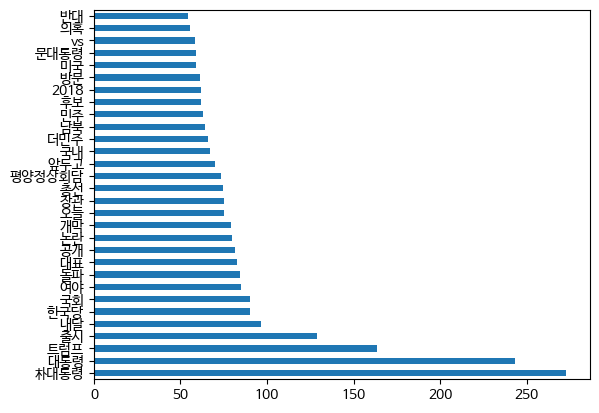

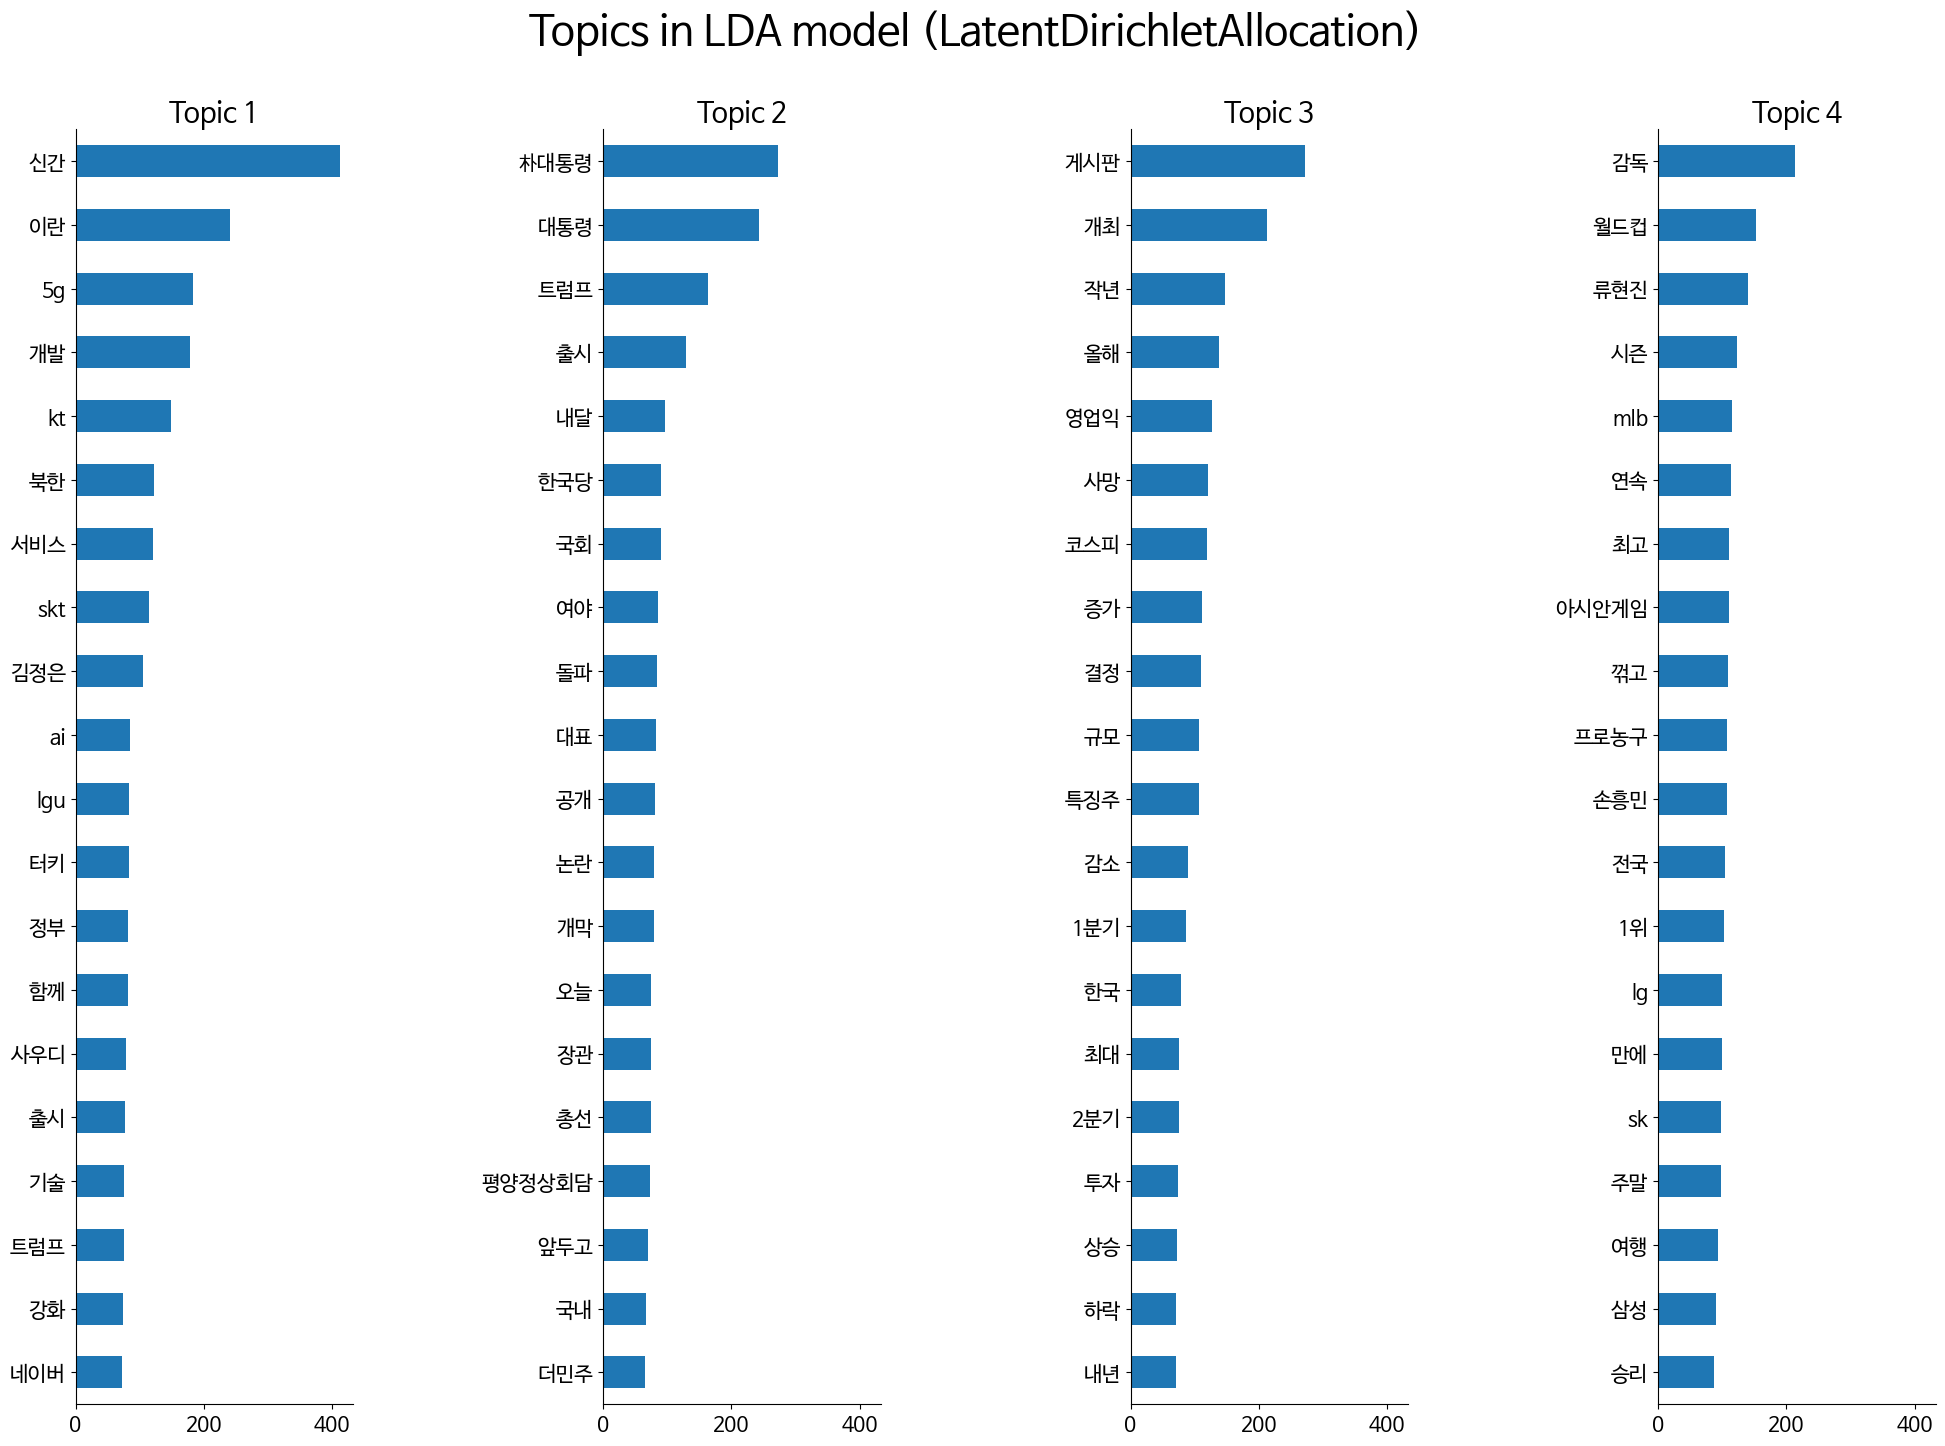

array(['생활문화', '사회', 'IT과학', '스포츠', '세계', '정치', '경제'], dtype=object)

,0,1,2,3,title,label
6,0.092277,0.092277,0.092277,0.723169,월드컵 태극전사 16강 전초기지 레오강 입성종합,스포츠
13,0.097410,0.095960,0.094559,0.712071,황재균 쐐기타…kt 갈 길 바쁜 삼성에 고춧가루,스포츠
28,0.313416,0.092238,0.336080,0.258267,손흥민 더 승부욕 갖고 거칠게 해야…나부터 반성,스포츠
33,0.078004,0.077621,0.078164,0.766211,다시 포효한 황의조 3년 만의 A매치 골 집중력 유지한...,스포츠
36,0.092329,0.092320,0.349304,0.466047,프리미어12 보러 온 MLB 최지만 저도 뛰고 싶었지만,스포츠
39,0.068887,0.068887,0.069091,0.793135,어빙 NBA 통산 1만 점…보스턴 동부 1위 토론토 제압...,스포츠
40,0.330794,0.092907,0.093216,0.483083,월드컵 하나은행 대표팀에 행운의 2달러 200장 선물,스포츠
41,0.103698,0.103698,0.103699,0.688905,라바리니호 아르헨에 설욕할까…이재영 동료 프레스코 경계령,스포츠
45,0.231508,0.204747,0.091369,0.472376,정성훈 15년 만에 친정 KIA행…기회 준 구단에 감사,스포츠
54,0.089536,0.108241,0.390309,0.411913,미국 프로스포츠 커밍아웃 뒤 출전 1호 축구선수 로저스 은퇴,스포츠


## NMF(Non-Negative Matrix Factorization) 토픽모델링
* https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.NMF.html#sklearn-decomposition-nmf
* 행렬분해기법

(45678, 4)

(4, 5000)

,0,1,2,3,title,label
0,0.000105,0.008253,0.001319,0.000627,유튜브 내달 2일까지 크리에이터 지원 공간 운영,생활문화
1,0.000000,0.000076,0.000043,0.000024,어버이날 맑다가 흐려져…남부지방 옅은 황사,생활문화
2,0.000003,0.000393,0.000743,0.000564,내년부터 국가RD 평가 때 논문건수는 반영 않는다,사회
3,0.000084,0.001719,0.000896,0.002665,김명자 신임 과총 회장 원로와 젊은 과학자 지혜 모을 것,사회
4,0.000271,0.001332,0.000063,0.000189,회색인간 작가 김동식 양심고백 등 새 소설집 2권 출간,생활문화
5,0.000000,0.005394,0.000000,0.000087,야외서 생방송 하세요…액션캠 전용 요금제 잇따라,IT과학
6,0.000066,0.001620,0.000774,0.002395,월드컵 태극전사 16강 전초기지 레오강 입성종합,스포츠
7,0.000001,0.001005,0.000443,0.000226,미세먼지 속 출근길,생활문화
8,0.000002,0.000019,0.001022,0.001621,왓츠앱稅 230원에 성난 레바논 민심…총리사퇴로 이어져종합2보,세계
9,0.000159,0.001582,0.003081,0.000983,베트남 경제 고성장 지속…2분기 GDP 6.71% 성장,세계


array(['생활문화', '사회', 'IT과학', '스포츠', '세계', '정치', '경제'], dtype=object)

,0,1,2,3,title,label
8,0.000002,0.000019,0.001022,0.001621,왓츠앱稅 230원에 성난 레바논 민심…총리사퇴로 이어져종합2보,세계
9,0.000159,0.001582,0.003081,0.000983,베트남 경제 고성장 지속…2분기 GDP 6.71% 성장,세계
10,0.000194,0.001458,0.001232,0.002539,그리스서 한국전 참전 기념식…참전용사 한반도 평화 기원,세계
12,0.000000,0.002061,0.002243,0.003290,美 베네수엘라 구호품 반입 촉구 안보리 결의 추진,세계
18,0.000014,0.001598,0.000415,0.000826,파키스탄 경제난 속 카타르서 30억 달러 투자 유치,세계
19,0.000322,0.001996,0.000630,0.001560,일본 예산팽창에 재정건전성 우려…내년에 장기채무 GDP 2배,세계
20,0.000081,0.001664,0.000351,0.002495,칠레 민중가수 살해하고 미국 도피 전 군인 법정에 선다,세계
21,0.000162,0.000182,0.000043,0.000084,日 온라인으로 중국인 비자신청 받는다,세계
22,0.000278,0.000311,0.000122,0.000253,미 동부 마비시킨 악성 파일 국내서도 발견,세계
32,0.000004,0.000053,0.000057,0.000171,日경제산업상 경제보복 비판여론에 언론이 제대로 이해못해,세계


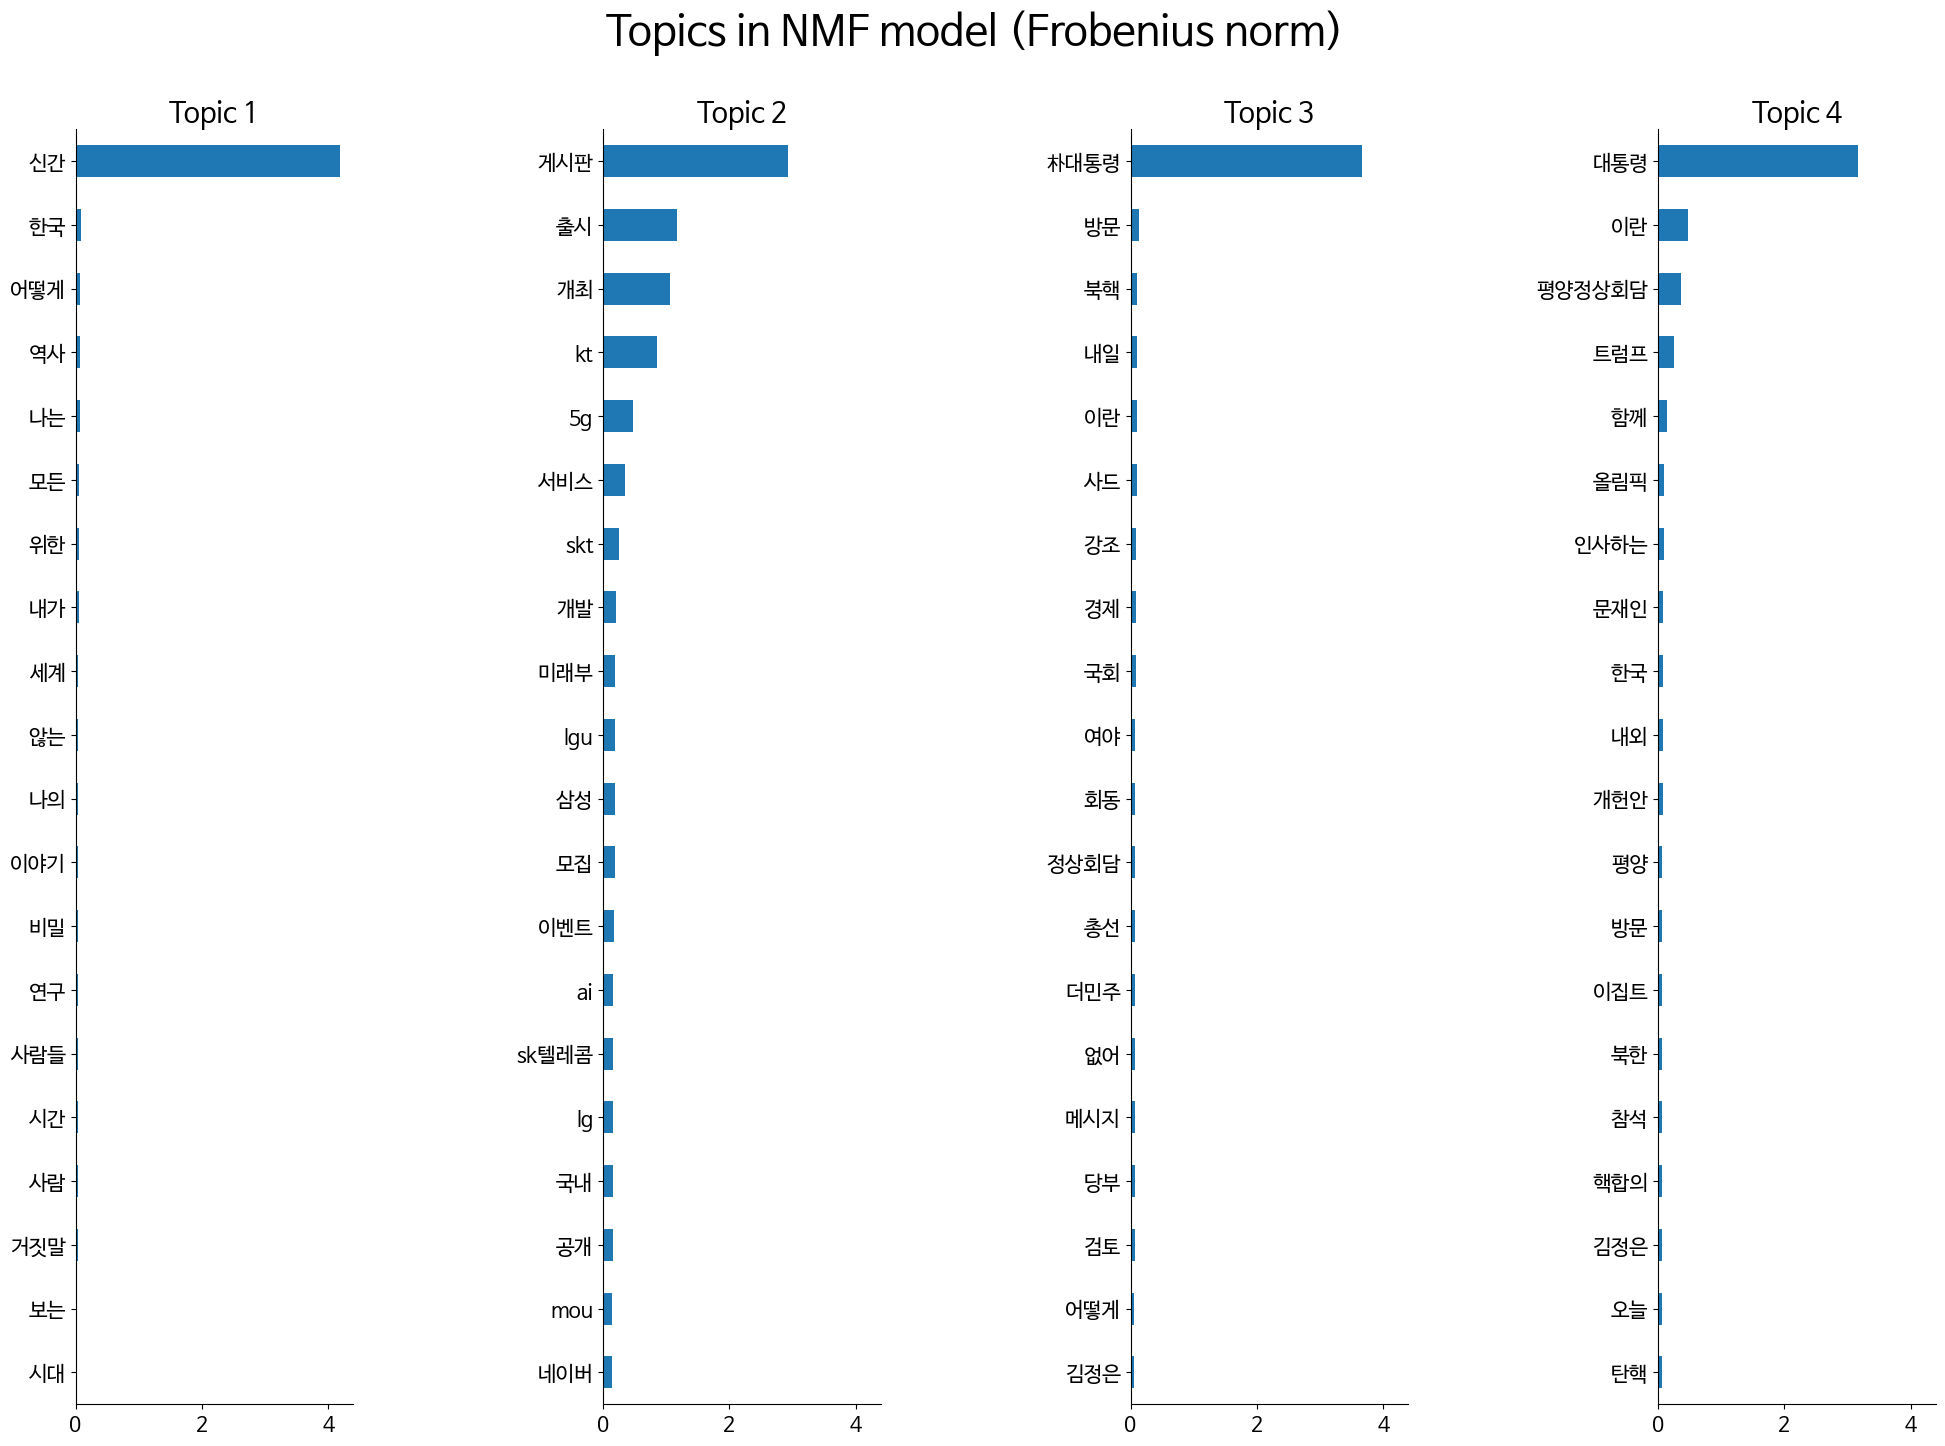

## 토픽별 워드클라우드

* https://github.com/amueller/word_cloud

In [ ]:
font_path = r"/Library/Fonts/NanumGothic.ttf"

In [ ]:
from wordcloud import WordCloud

# 워드클라우드 생성하는 함수
def draw_wordclouds(topic_words, topic_idx, font_path=font_path):

    # 워드클라우드 불러오기
    wordcloud = WordCloud(width=800, height=400,
                          background_color='white',
                          font_path=font_path,
                         ).generate_from_frequencies(topic_words)

    # 워드클라우드 시각화
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Topic {topic_idx+1}', fontsize=20)
    plt.axis("off")
    plt.show()

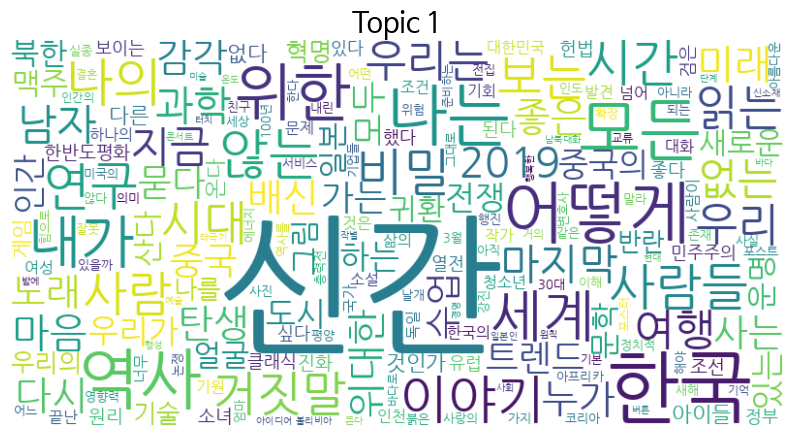

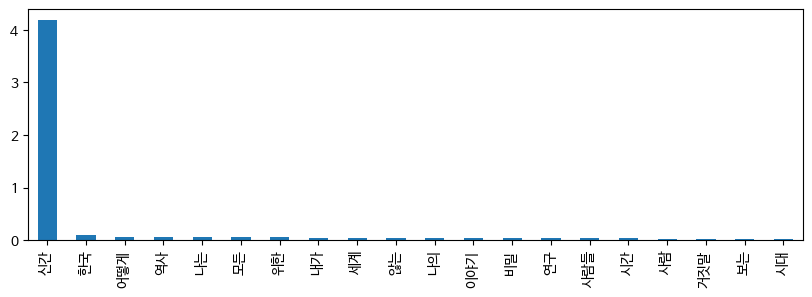

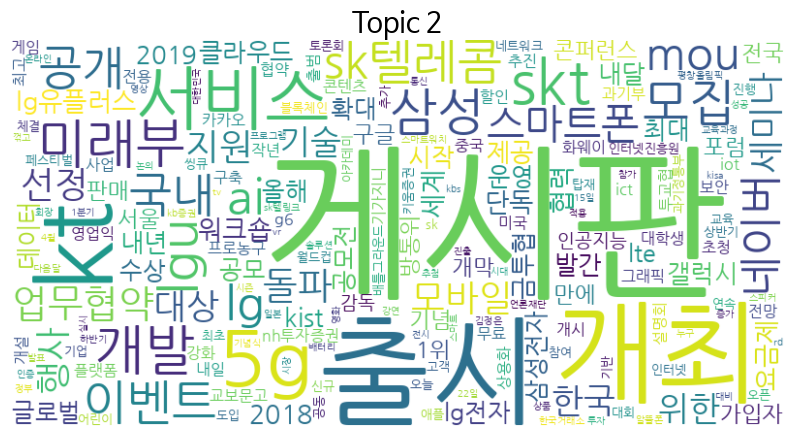

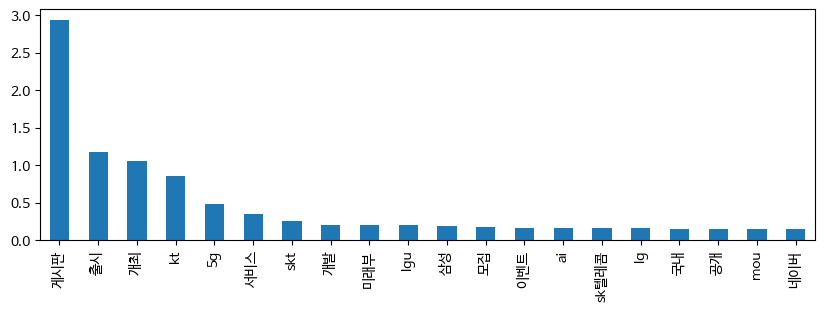

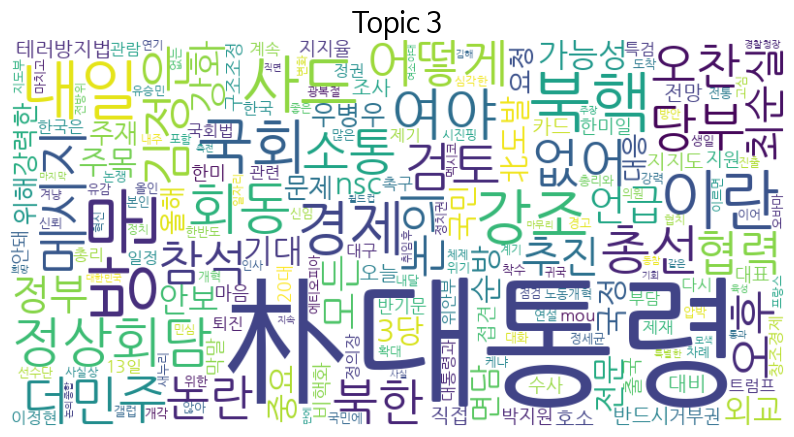

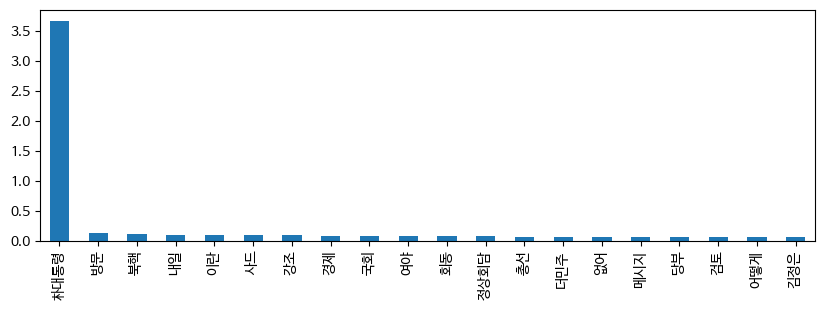

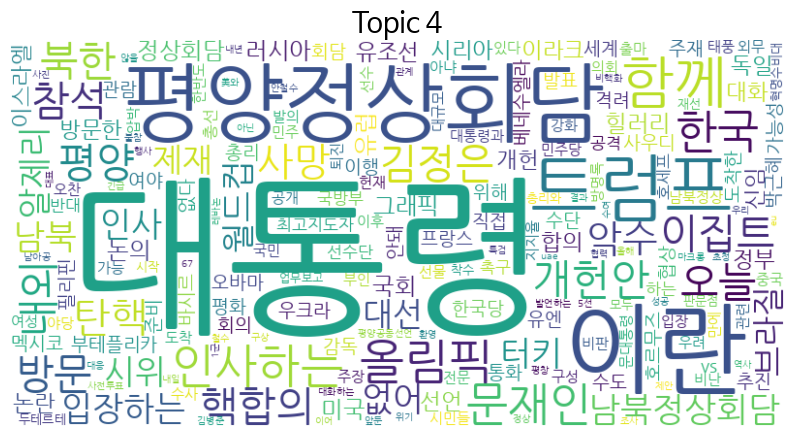

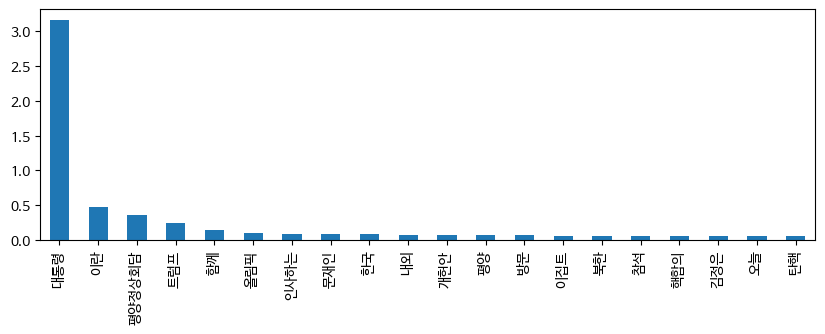

## CountVectorizer

<45678x5000 sparse matrix of type '<class 'numpy.int64'>'
	with 174269 stored elements in Compressed Sparse Row format>

출시      767
게시판     750
대통령     747
朴대통령    695
이란      686
감독      677
kt      671
신간      638
트럼프     621
한국      548
5g      515
개최      486
만에      462
삼성      437
개발      408
올해      393
네이버     390
월드컵     388
lg      383
정부      383
dtype: int64

((45678, 4), (4, 5000))

,00,01,02,03,10,100,100년,100만,100만명,100만원,...,흥행,희망,희비,희생자,히어로즈,힐러리,힐러리트럼프,힐만,힘으로,女배구
0,0.001231,0.005987,0.000289,0.001942,0.049098,0.007632,0.003579,0.045136,0.006630,0.005261,...,0.015122,0.005411,0.003319,0.000947,0.004466,0.003545,0.000308,0.008116,0.002084,0.003435
1,0.000330,0.000245,0.000070,0.000388,0.014017,0.002924,0.000379,0.008080,0.000426,0.000434,...,0.000822,0.009044,0.000000,0.002196,0.000002,0.037315,0.000210,0.000000,0.000105,0.001008
2,0.000057,0.000000,0.000104,0.000000,0.006274,0.006103,0.001774,0.000000,0.000000,0.000000,...,0.000000,0.000112,0.000000,0.000340,0.000023,0.000000,0.000000,0.000000,0.000000,0.000176
3,0.001013,0.000996,0.000428,0.001433,0.012239,0.001686,0.000799,0.000000,0.000225,0.000644,...,0.000689,0.013112,0.006322,0.001599,0.000389,0.077692,0.000478,0.008637,0.000349,0.005299


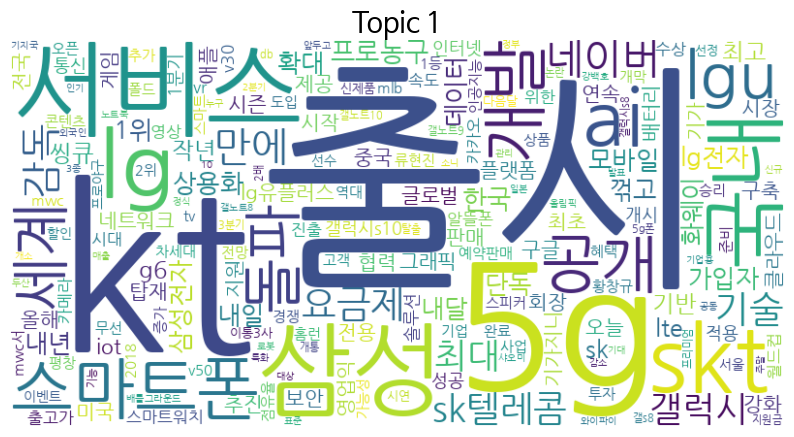

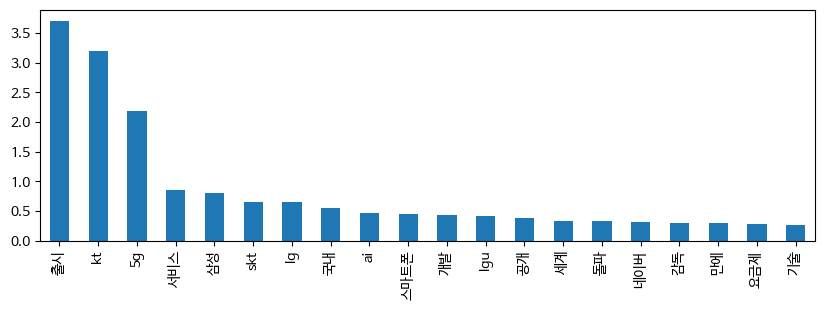

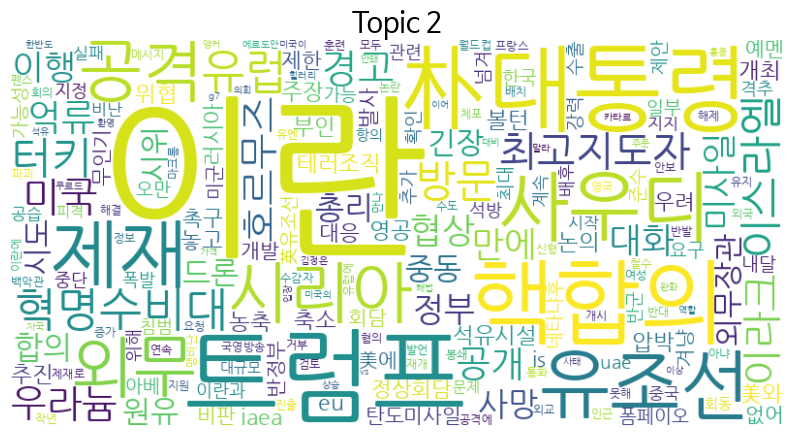

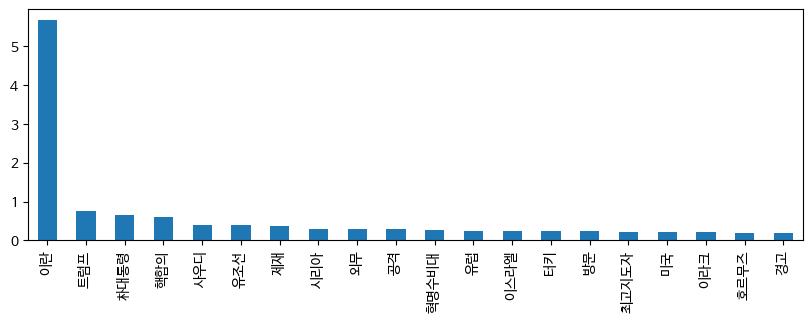

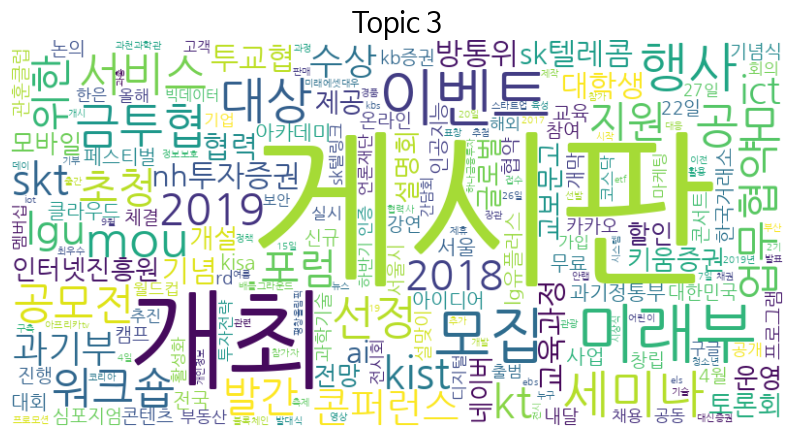

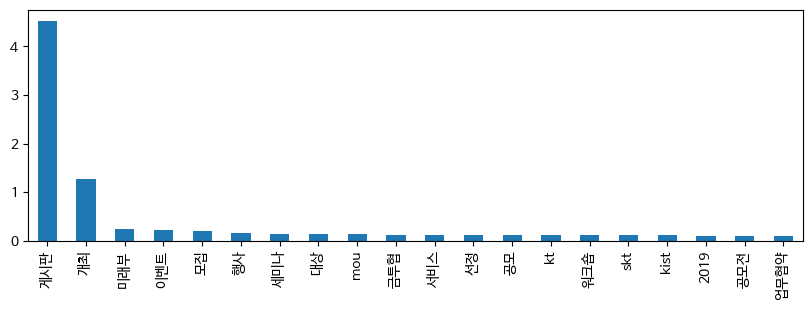

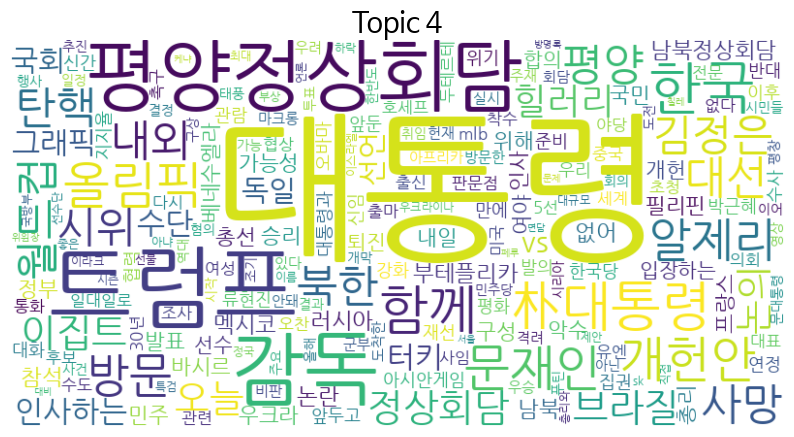

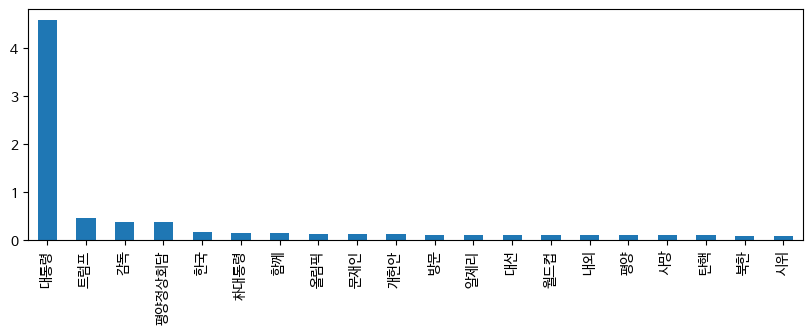